In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from  sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


In [2]:
data_url='https://raw.githubusercontent.com/digipodium/Datasets/main/Salary_Data.csv'
df=pd.read_csv(data_url)
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

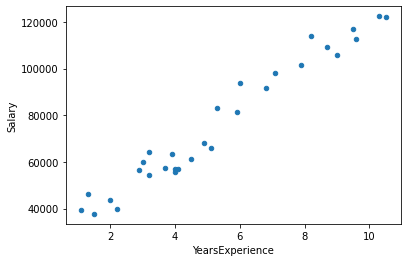

In [3]:
df.plot(x='YearsExperience',y='Salary',kind='scatter')

In [4]:
#step 2
X=df[['YearsExperience']]
y=df['Salary']

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.3,random_state=1)

In [7]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(xtrain,ytrain)


LinearRegression()

In [8]:
score=reg.score(xtest,ytest)*100
print(f'the score is {score}% for our model')

the score is 92.48580247217075% for our model


In [9]:
df['predictions']=reg.predict(X)
df.head()

,YearsExperience,Salary,predictions
0,1.1,39343.0,36172.034674
1,1.3,46205.0,38012.481393
2,1.5,37731.0,39852.928113
3,2.0,43525.0,44454.044912
4,2.2,39891.0,46294.491632


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

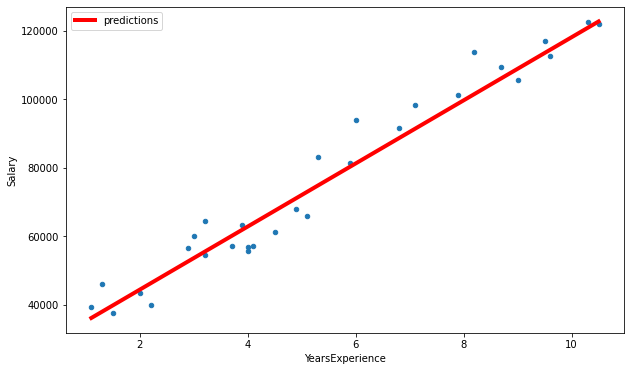

In [10]:
ax=df.plot(x='YearsExperience',y='Salary',kind='scatter',figsize=(10,6))
df.plot(x='YearsExperience',y='predictions',ax=ax,color='red',linewidth=4)

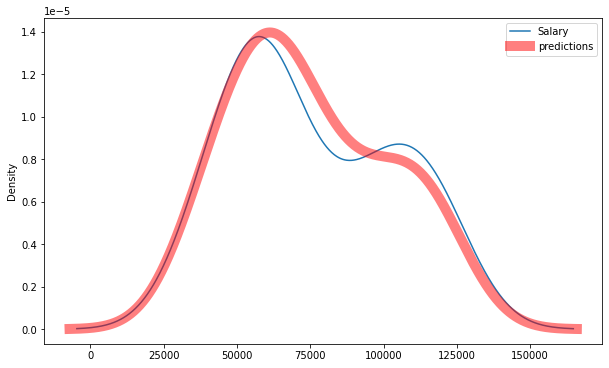

In [11]:
ax = df.plot(kind='kde',x='YearsExperience',y='Salary',figsize=(10,6))
df.plot(kind='kde',x='YearsExperience',y='predictions',ax=ax,color='red',alpha=.5,linewidth=10)
plt.show()

In [12]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [13]:
r2_score(df.Salary,df.predictions)

0.9547556783383696

In [14]:
mean_absolute_error(df.Salary,df.predictions)

4753.997284296921

In [15]:
from joblib import dump

In [18]:
dump(reg,"mode2_v1.pk1")

['mode2_v1.pk1']

In [16]:
from joblib import load

In [19]:
reg1=load("mode2_v1.pk1")

In [21]:
reg1.predict([[5],[12]])

C:\Users\KASHISH JAISWAL\Miniconda3\envs\digi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 72060.74570672, 136476.3808945 ])